# **Reinforcement Learning**

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt

# Reinforcement Learning

El aprendizaje por refuerzo (RL) es uno de los campos más apasionantes del aprendizaje automático actual, y también uno de los más antiguos. Lleva existiendo desde la década de 1950 y ha dado lugar a muchas aplicaciones interesantes a lo largo de los años, sobre todo en juegos (por ejemplo, TD-Gammon, un programa para jugar al backgammon) y en el control de máquinas, pero rara vez ha sido noticia. Sin embargo, en 2013 se produjo una revolución, cuando investigadores de una startup británica llamada DeepMind demostraron un sistema que podía aprender a jugar a casi cualquier juego de Atari desde cero, superando finalmente a los humanos en la mayoría de ellos, utilizando solo píxeles en bruto como entradas y sin ningún conocimiento previo de las reglas de los juegos.  Esta fue la primera de una serie de hazañas asombrosas, que culminaron con la victoria de su sistema AlphaGo contra Lee Sedol, un legendario jugador profesional del juego del Go, en marzo de 2016, y contra Ke Jie, el campeón del mundo, en mayo de 2017. Ningún programa se había acercado nunca a vencer a un maestro de este juego, y mucho menos al campeón del mundo. Hoy en día, todo el campo del RL hierve de nuevas ideas, con un amplio abanico de aplicaciones.

Entonces, ¿cómo logró DeepMind (comprada por Google por más de 500 millones de dólares en 2014) todo esto? En retrospectiva parece bastante simple: aplicaron el poder del aprendizaje profundo al campo del aprendizaje por refuerzo, y funcionó más allá de sus sueños más salvajes. En este capítulo explicaré primero qué es el aprendizaje por refuerzo y para qué sirve, y luego presentaré dos de las técnicas más importantes del aprendizaje por refuerzo profundo: los gradientes de política y las redes Q profundas, incluyendo un análisis de los procesos de decisión de Markov. Empecemos.


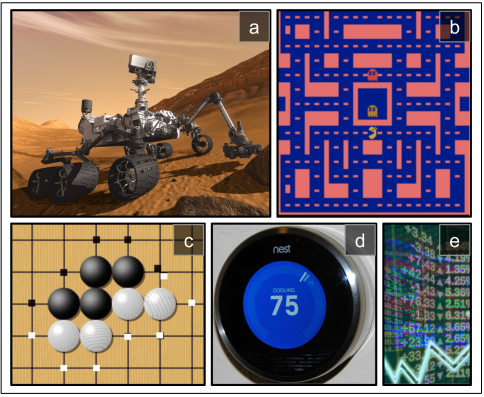

## Búsqueda de políticas

El algoritmo que utiliza un agente software para determinar sus acciones se denomina política. La política puede ser una red neuronal que toma las observaciones como entradas y emite la acción a realizar.

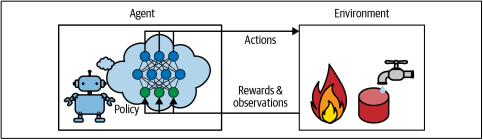

La política puede ser cualquier algoritmo que se te ocurra y no tiene por qué ser determinista. De hecho, en algunos casos ni siquiera tiene que observar el entorno. Por ejemplo, un robot aspirador cuya recompensa es la cantidad de polvo que recoge en 30 minutos. Su política podría ser avanzar con una probabilidad p cada segundo o girar aleatoriamente a la izquierda o a la derecha con una probabilidad 1 - p. El ángulo de giro sería un ángulo aleatorio comprendido entre -r y +r. Dado que esta política implica cierta aleatoriedad, se denomina política estocástica. El robot tendrá una trayectoria errática, lo que garantiza que acabará llegando a cualquier lugar al que pueda llegar y recogiendo todo el polvo. La pregunta es: ¿cuánto polvo recogerá en 30 minutos?

¿Cómo se entrena a un robot así? Sólo hay dos parámetros de política que se pueden ajustar: la probabilidad p y el rango angular r. Un posible algoritmo de aprendizaje podría ser probar muchos valores diferentes para estos parámetros, y elegir la combinación que mejor funcione (ver Figura 18-3). Este es un ejemplo de búsqueda de políticas, en este caso utilizando un enfoque de fuerza bruta. Cuando el espacio de políticas es demasiado grande (que suele ser el caso), encontrar un buen conjunto de parámetros de esta manera es como buscar una aguja en un pajar gigantesco.

Otra forma de explorar el espacio de políticas es utilizar algoritmos genéticos. Por ejemplo, se podría crear aleatoriamente una primera generación de 100 políticas y probarlas, luego "matar" las 80 peores políticas y hacer que las 20 supervivientes produzcan 4 descendientes cada una. Un descendiente es una copia de su progenitor más alguna variación aleatoria. Las políticas supervivientes y sus descendientes constituyen la segunda generación. Puedes continuar iterando a través de generaciones de esta manera hasta que encuentres una buena política.

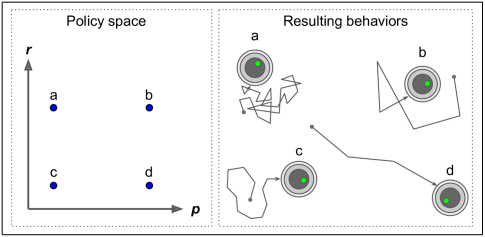

Otro enfoque consiste en utilizar técnicas de optimización, evaluando los gradientes de las recompensas con respecto a los parámetros de la política, y luego ajustando estos parámetros siguiendo los gradientes hacia recompensas más altas. Este enfoque, llamado gradientes de política (PG), lo veremos con más detalle más adelante en este capítulo. Volviendo al robot aspirador, se podría aumentar ligeramente p y evaluar si al hacerlo aumenta la cantidad de polvo recogido por el robot en 30 minutos; si lo hace, entonces aumentar p un poco más, o bien reducir p. Vamos a implementar un algoritmo PG popular usando TensorFlow, pero antes de hacerlo, tenemos que crear un entorno para que el agente viva, así que es hora de introducir OpenAI Gym.

## Aprender a optimizar las recompensas

En el aprendizaje por refuerzo, un agente informático realiza observaciones y acciones en un entorno y, a cambio, recibe recompensas del entorno. Su objetivo es aprender a actuar de forma que maximice sus recompensas esperadas a lo largo del tiempo. Si no te importa un poco de antropomorfismo, puedes pensar en las recompensas positivas como placer y en las negativas como dolor (el término "recompensa" es un poco engañoso en este caso). En resumen, el agente actúa en el entorno y aprende por ensayo y error a maximizar su placer y minimizar su dolor.

Se trata de una configuración bastante amplia, que puede aplicarse a una gran variedad de tareas:


a. El agente puede ser el programa que controla un robot. En este caso, el entorno es el mundo real, el agente observa el entorno a través de un conjunto de sensores como cámaras y sensores táctiles, y sus acciones consisten en enviar señales para activar motores. Puede programarse para obtener recompensas positivas siempre que se acerque al destino objetivo, y recompensas negativas siempre que pierda tiempo o vaya en la dirección equivocada.

b. El agente puede ser el programa que controla a Ms. Pac-Man. En este caso, el entorno es una simulación del juego de Atari, las acciones son las nueve posiciones posibles del joystick (arriba a la izquierda, abajo, centro, etc.), las observaciones son capturas de pantalla y las recompensas son sólo los puntos del juego.

c. Del mismo modo, el agente puede ser el programa que juega a un juego de mesa como el Go. Sólo obtiene una recompensa si gana.

d. El agente no tiene por qué controlar un objeto que se mueva física (o virtualmente). Por ejemplo, puede ser un termostato inteligente, que obtiene recompensas positivas siempre que se acerca a la temperatura objetivo y ahorra energía, y recompensas negativas cuando los humanos necesitan ajustar la temperatura, por lo que el agente debe aprender a anticiparse a las necesidades humanas.

e. El agente puede observar los precios de la bolsa y decidir cuánto comprar o vender cada segundo. Las recompensas son, obviamente, las ganancias y pérdidas monetarias.

Hay que tener en cuenta que puede no haber ninguna recompensa positiva; por ejemplo, el agente puede moverse por un laberinto obteniendo una recompensa negativa en cada paso temporal, así que más le vale encontrar la salida lo antes posible. Hay muchos otros ejemplos de tareas para las que el aprendizaje por refuerzo es muy adecuado, como los coches autónomos, los sistemas de recomendación, la colocación de anuncios en una página web o el control de dónde debe centrar su atención un sistema de clasificación de imágenes.

# Introduction to OpenAI gym

Uno de los retos del aprendizaje por refuerzo es que, para entrenar a un agente, primero hay que tener un entorno de trabajo. Si quiere programar un agente que aprenda a jugar a un juego de Atari, necesitará un simulador de juegos de Atari. Si quieres programar un robot que camine, entonces el entorno es el mundo real, y puedes entrenar directamente a tu robot en ese entorno. Sin embargo, esto tiene sus límites: si el robot se cae por un precipicio, no puedes simplemente hacer clic en Deshacer. Tampoco se puede acelerar el tiempo -añadir más potencia de cálculo no hará que el robot se mueva más rápido- y, por lo general, es demasiado caro entrenar a 1.000 robots en paralelo. En resumen, el entrenamiento es difícil y lento en el mundo real, por lo que generalmente se necesita un entorno simulado al menos para el entrenamiento inicial. Por ejemplo, puedes utilizar una biblioteca como PyBullet o MuJoCo para simular la física 3D.

OpenAI Gym es un conjunto de herramientas que proporciona una amplia variedad de entornos simulados (juegos Atari, juegos de mesa, simulaciones físicas 2D y 3D, etc.), que puedes utilizar para entrenar agentes, compararlos o desarrollar nuevos algoritmos de RL.

OpenAI Gym está preinstalado en Colab, pero es una versión antigua, por lo que tendrás que sustituirla por la más reciente. También es necesario instalar algunas de sus dependencias. Si estás codificando en tu propia máquina en lugar de Colab, y has seguido las instrucciones de instalación en https://homl.info/install, entonces puedes saltarte este paso; de lo contrario, introduce estos comandos:

En este NoteBook usaremos [OpenAI gym](https://gym.openai.com/), un gran conjunto de herramientas para desarrollar y comparar algoritmos de Aprendizaje por Refuerzo. Proporciona muchos entornos para que tus *agentes* de aprendizaje interactúen. Vamos a importar Gym y crear un nuevo entorno CartPole:

In [7]:
import gym

env = gym.make("CartPole-v1", render_mode="rgb_array")

Aquí, hemos creado un entorno CartPole. Se trata de una simulación 2D en la que un carro  puede acelerarse hacia la izquierda o hacia la derecha para equilibrar un poste colocado encima  de él (véase la figura 18.4). Se trata de una tarea de control clásica. 

In [ ]:
# muestra los primeros entornos
envs = gym.envs.registry
sorted(envs.keys())[:5] + ["..."]

['ALE/Adventure-ram-v5',
 'ALE/Adventure-v5',
 'ALE/AirRaid-ram-v5',
 'ALE/AirRaid-v5',
 'ALE/Alien-ram-v5',
 '...']

In [ ]:
# muestra la especificación para el entorno CartPole-v1
envs["CartPole-v1"]

EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1)

Vamos a inicializar el medio ambiente llamando es `reset()` método. Esto devuelve una observación, así como un diccionario que puede contener información adicional. Ambos son específicos del entorno.

In [10]:
obs, info = env.reset(seed=42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [11]:
info

{}

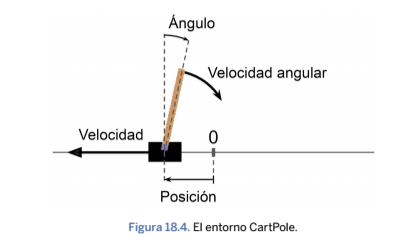

En el caso del CartPole, cada observación es un array NumPy 1D compuesto por 4 floats: representan la posición horizontal del carro, su velocidad, el ángulo del polo (0 = vertical) y la velocidad angular.

Vamos a llamar al método render() para representar este entorno como una imagen. Puesto  que hemos configurado render_mode="rgb_array" al crear el entorno, la imagen se devolverá  como una matriz NumPy:

In [ ]:
img = env.render()
img.shape  # altura, anchura, canales (3 = Rojo, Verde, Azul)

(400, 600, 3)

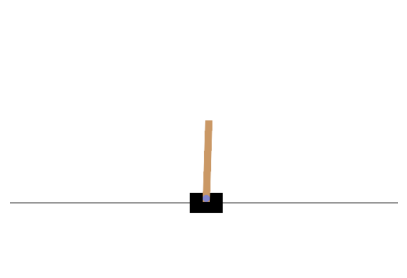

In [ ]:
# crea una pequeña función para representar y trazar un entorno

def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

Ahora podemos utilizar la función imshow() de Matplotlib para mostrar esta imagen, del  modo habitual.  Ahora, vamos a preguntar al entorno qué acciones son posibles: 

In [14]:
env.action_space

Discrete(2)

Sí, sólo dos acciones posibles: acelerar hacia la izquierda (0) o hacia la derecha (1).

Como el poste está inclinado hacia la derecha (`obs[2] > 0`), aceleremos el carro hacia la derecha:

In [ ]:
action = 1  # acelera a la derecha
obs, reward, done, truncated, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Observa que el carro se mueve ahora hacia la derecha (`obs[1] > 0`). El poste sigue inclinado hacia la derecha (`obs[2] > 0`), pero su velocidad angular es ahora negativa (`obs[3] < 0`), por lo que probablemente se inclinará hacia la izquierda después del siguiente paso.

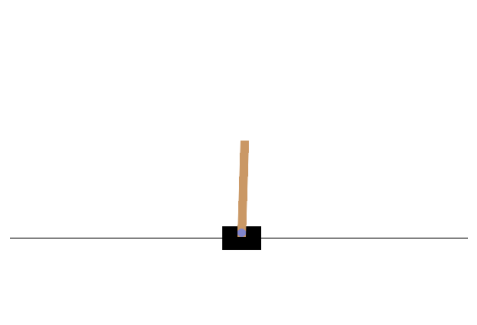

In [ ]:
# muestra el entorno
plot_environment(env)
plt.show()

Parece que hace lo que le decimos.

El entorno también indica al agente cuánta recompensa obtuvo durante el último paso:

In [17]:
reward

1.0

Cuando el juego termina, el entorno devuelve `done=True`. En este caso, aún no ha terminado:

In [18]:
done

False

Algunas envolturas de entorno pueden querer interrumpir el entorno antes de tiempo. Por ejemplo, cuando se alcanza un límite de tiempo o cuando un objeto sale de los límites. En este caso, `truncated` se pondrá a `True`. En este caso, aún no está truncado:

In [19]:
truncated

False

Por último, `info` es un diccionario específico del entorno que puede proporcionar alguna información extra que te puede resultar útil para depurar o para entrenar. Por ejemplo, en algunos juegos puede indicar cuántas vidas tiene el agente.

In [20]:
info

{}

La secuencia de pasos entre el momento en que se reinicia el entorno hasta que se termina o trunca se denomina "episodio". Al final de un episodio (es decir, cuando `step()` devuelve `done=True` o `truncated=True`), debes reiniciar el entorno antes de seguir utilizándolo.

In [21]:
if done or truncated:
    obs, info = env.reset()

Ahora, ¿cómo podemos hacer que la encuesta permanezca en posición vertical? Para ello necesitaremos definir una _política_. Esta es la estrategia que el agente utilizará para seleccionar una acción en cada paso. Puede utilizar todas las acciones y observaciones pasadas para decidir qué hacer.

## Política básica

Vamos a codificar una estrategia simple: si el poste se inclina hacia la izquierda, entonces empuja el carro hacia la izquierda, y _vice versa_. Veamos si funciona:

In [22]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break

    totals.append(episode_rewards)

In [23]:
import numpy as np

np.mean(totals), np.std(totals), min(totals), max(totals)

(41.698, 8.389445512070509, 24.0, 63.0)

Bueno, como era de esperar, esta estrategia es demasiado básica: lo mejor que hizo fue mantener el sondeo durante sólo 63 pasos. Este entorno se considera resuelto cuando el agente mantiene el sondeo durante 200 pasos.

In [ ]:
# esta celda muestra una animación de un episodio

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)

show_one_episode(basic_policy)

Está claro que el sistema es inestable y, tras unos pocos tambaleos, el poste acaba demasiado inclinado: game over. Tendremos que ser más listos.

## Políticas de redes neuronales

Vamos a crear una red neuronal que tomará las observaciones como entradas y emitirá las probabilidades de las acciones a tomar para cada observación. Para elegir una acción, la red estimará una probabilidad para cada acción y, a continuación, seleccionaremos una acción al azar de acuerdo con las probabilidades estimadas. En el caso del entorno CartPole, sólo hay dos acciones posibles (izquierda o derecha), por lo que sólo necesitamos una neurona de salida: emitirá la probabilidad `p` de la acción 0 (izquierda) y, por supuesto, la probabilidad de la acción 1 (derecha) será `1 - p`.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

En este entorno concreto, las acciones y observaciones pasadas pueden ignorarse con seguridad, ya que cada observación contiene el estado completo del entorno. Si hubiera algún estado oculto, entonces tendrías que tener en cuenta las acciones y observaciones pasadas para intentar deducir el estado oculto del entorno. Por ejemplo, si el entorno sólo revelara la posición del carro, pero no su velocidad, habría que tener en cuenta no sólo la observación actual, sino también la anterior, para estimar la velocidad actual. Otro ejemplo es si las observaciones son ruidosas: habría que utilizar las últimas observaciones para estimar el estado actual más probable. Así pues, nuestro problema es de lo más sencillo: la observación actual no tiene ruido y contiene el estado completo del entorno.

Puede que te preguntes por qué planeamos elegir una acción aleatoria basada en la probabilidad dada por la red de políticas, en lugar de elegir simplemente la acción con la probabilidad más alta. Este enfoque permite al agente encontrar el equilibrio adecuado entre _explorar_ nuevas acciones y _explotar_ las acciones que se sabe que funcionan bien. He aquí una analogía: supongamos que vamos a un restaurante por primera vez y todos los platos nos parecen igual de apetecibles, así que elegimos uno al azar. Si resulta ser bueno, puedes aumentar la probabilidad de pedirlo la próxima vez, pero no debes aumentar esa probabilidad al 100%, o de lo contrario nunca probarás los demás platos, algunos de los cuales pueden ser incluso mejores que el que probaste.

Escribamos una pequeña función política que utilizará la red neuronal para obtener la probabilidad de moverse a la izquierda, luego utilicémosla para ejecutar un episodio:

In [ ]:
# una función que crea una animación para un modelo de política dado

def pg_policy(obs):
    left_proba = model.predict(obs[np.newaxis], verbose=0)
    return int(np.random.rand() > left_proba)

np.random.seed(42)
show_one_episode(pg_policy)

Sí... bastante mal. La red neuronal tendrá que aprender a hacerlo mejor. Primero veamos si es capaz de aprender la política básica que usamos antes: ir a la izquierda si el poste se inclina a la izquierda, e ir a la derecha si se inclina a la derecha.

Veamos si puede aprender una política mejor por sí mismo. Una que no se tambalee tanto.

# Policy Gradients

Para entrenar esta red neuronal necesitaremos definir las probabilidades objetivo **y**. Si una acción es buena, deberemos aumentar su probabilidad, y a la inversa, si es mala, deberemos reducirla. Pero, ¿cómo sabemos si una acción es buena o mala? El problema es que la mayoría de las acciones tienen efectos retardados, así que cuando ganas o pierdes puntos en un episodio, no está claro qué acciones contribuyeron a este resultado: ¿fue sólo la última acción? ¿O las 10 últimas? ¿O sólo una acción 50 pasos antes? A esto se le llama el _problema de la asignación de créditos_.

El algoritmo _Policy Gradients_ aborda este problema jugando primero varios episodios y haciendo que las acciones cercanas a las recompensas positivas sean ligeramente más probables, mientras que las acciones cercanas a las recompensas negativas son ligeramente menos probables. Primero jugamos, luego volvemos atrás y pensamos en lo que hemos hecho.

Empecemos por crear una función que reproduzca un solo paso utilizando el modelo. También vamos a pretender por ahora que cualquier acción que tome es la correcta, por lo que podemos calcular la pérdida y sus gradientes. Guardaremos estos gradientes por ahora, y los modificaremos más tarde dependiendo de lo buena o mala que haya resultado la acción.

In [27]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, truncated, info = env.step(int(action))
    return obs, reward, done, truncated, grads

Si `proba_izquierda` es alto, entonces `acción` será probablemente `Falso` (ya que un número aleatorio muestreado uniformemente entre 0 y 1 probablemente no será mayor que `proba_izquierda`). Y `False` significa 0 cuando lo conviertes en un número, así que `y_target` sería igual a 1 - 0 = 1. En otras palabras, fijamos el objetivo en 1, lo que significa que pretendemos que la probabilidad de ir a la izquierda debería haber sido del 100% (por lo que tomamos la acción correcta).

Ahora vamos a crear otra función que se basará en la función `play_one_step()` para reproducir múltiples episodios, devolviendo todas las recompensas y gradientes, para cada episodio y cada paso:

In [28]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, truncated, grads = play_one_step(
                env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done or truncated:
                break

        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    return all_rewards, all_grads

El algoritmo Policy Gradients utiliza el modelo para reproducir el episodio varias veces (por ejemplo, 10 veces), luego vuelve atrás y mira todas las recompensas, las descuenta y las normaliza. Así que vamos a crear un par de funciones para eso: la primera calculará las recompensas descontadas; la segunda normalizará las recompensas descontadas a través de muchos episodios.

In [29]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Supongamos que hay 3 acciones y que después de cada acción hay una recompensa: primero 10, luego 0 y después -50. Si utilizamos un factor de descuento del 80%, entonces la 3ª acción obtendrá -50 (crédito completo por la última recompensa), pero la 2ª acción sólo obtendrá -40 (crédito del 80% por la última recompensa), y la 1ª acción obtendrá el 80% de -40 (-32) más el crédito completo por la primera recompensa (+10), lo que lleva a una recompensa descontada de -22:

In [30]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

Para normalizar todas las recompensas descontadas en todos los episodios, calculamos la media y la desviación estándar de todas las recompensas descontadas, restamos la media de cada recompensa descontada y dividimos por la desviación estándar:

In [31]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [32]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

In [ ]:
# vamos a crear la red neuronal y restablecer el medio ambiente, para
# reproducibilidad

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

obs, info = env.reset(seed=42)

In [34]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

In [ ]:
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)

    # muestra información de depuración durante el entrenamiento
    total_rewards = sum(map(sum, all_rewards))
    print(f"\rIteration: {iteration + 1}/{n_iterations},"
          f" mean rewards: {total_rewards / n_episodes_per_update:.1f}", end="")

    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_factor)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Iteration: 150/150, mean rewards: 190.3

In [ ]:
# muestra la animación
np.random.seed(42)
show_one_episode(pg_policy)

# Proceso de decisión de Markov

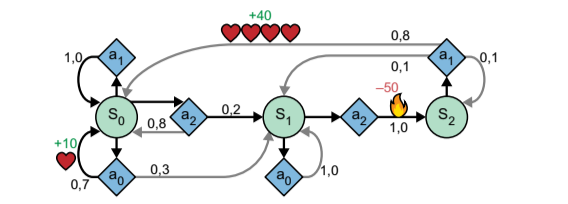

Si empieza en el estado s0, el agente puede elegir entre las acciones a0, a1 o a2. Si elige la  acción a1, permanece en el estado s0 con certeza y sin ninguna recompensa. Así, puede decidir  quedarse ahí para siempre si lo desea. Pero, si elige la acción a0, tiene una probabilidad del 70%  de ganar una recompensa de +10 y permanecer en el estado s0. Después, puede intentar una  y otra vez obtener tanta recompensa como sea posible, pero, en algún momento, va a acabar  en el estado s1.  

En el estado s1 tiene solo dos acciones posibles: a0 o a2. Puede elegir entre quedarse ahí al  elegir repetidamente la acción a0 o puede elegir pasar al estado s2 y obtener una recompensa  negativa de -50 (eso duele). En el estado s2 no tiene más opción que realizar la acción a1, que  probablemente volverá a llevarlo al estado s0, obteniendo una recompensa de +40 por el camino.  Ya te haces una idea. Si te fijas en este proceso de decisión de Markov, ¿puedes adivinar qué  estrategia obtendrá más recompensa con el tiempo? En el estado s0, está claro que la mejor opción es la acción a0 y en el estado s2 el agente no tiene más opción que realizar la acción a1,  pero, en el estado s1, no resulta obvio si el agente debería quedarse quieto (a0) o avanzar entre  las llamas (a2).


In [38]:
transition_probabilities = [  # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None]
]
rewards = [  # shape=[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]
possible_actions = [[0, 1, 2], [0, 2], [1]]

# Q-Value Iteration

$$Q_{k+1}(s,a) <- \sum_{s`}{T(s,a,s`)}[R(s,a,s`)+\delta * max Q_{k}(s`,a`)]\space \text{para todo} (s,a)$$

In [ ]:
Q_values = np.full((3, 3), -np.inf)  # -np.inf para acciones imposibles
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # para todas las acciones posibles

In [ ]:
gamma = 0.90  # el factor de descuento

history1 = []  #  necesario para la siguiente figura
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * Q_prev[sp].max())
                for sp in range(3)])

history1 = np.array(history1)

In [41]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
Q_values.argmax(axis=1)  # acción óptima para cada estado

array([0, 0, 1])

La política óptima para este MDP, cuando se utiliza un factor de descuento de 0.90, es elegir la acción a0 cuando se está en el estado s0, y elegir la acción a0 cuando se está en el estado s1, y finalmente elegir la acción a1 (la única acción posible) cuando se está en el estado s2. Si vuelve a intentarlo con un factor de descuento de 0.95 en lugar de 0.90, verá que la acción óptima para el estado s1 pasa a ser a2. Esto se debe a que el factor de descuento es mayor, por lo que el agente valora más el futuro y, por tanto, está dispuesto a pagar una penalización inmediata para obtener más recompensas futuras.

# Q-Learning

El Q-Learning funciona observando a un agente jugar (por ejemplo, aleatoriamente) y mejorando gradualmente sus estimaciones de los Valores-Q. Una vez que tiene estimaciones precisas de los valores Q (o lo suficientemente cercanas), la política óptima consiste en elegir la acción que tenga el valor Q más alto (es decir, la política codiciosa).

Necesitaremos simular un agente moviéndose por el entorno, así que definamos una función para realizar alguna acción y obtener el nuevo estado y una recompensa:

In [43]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

También necesitamos una política de exploración, que puede ser cualquier política, siempre que visite todos los estados posibles muchas veces. Usaremos una política aleatoria, ya que el espacio de estados es muy pequeño:

In [44]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

Ahora inicialicemos los valores Q como antes, y ejecutemos el algoritmo Q-Learning:

In [ ]:
# inicializa los valores Q, igual que antes
np.random.seed(42)
Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

In [ ]:
alpha0 = 0.05  # tasa de aprendizaje inicial
decay = 0.005  # decaimiento del ritmo de aprendizaje
gamma = 0.90  # factor de descuento
state = 0  # estado inicial
history2 = [] 

for iteration in range(10_000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = Q_values[next_state].max()  # política codiciosa en el siguiente paso
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2)

Este algoritmo convergerá en los valores Q óptimos, pero harán falta muchas iteraciones  y, posiblemente, mucho ajuste de los hiperparámetros. Como se ve a continuación, el algoritmo  de iteración de valor Q (izquierda) converge con mucha rapidez, en menos de 20 iteraciones,  mientras que el algoritmo de aprendizaje Q-Learning (derecha) necesita unas 8.000 iteraciones  para converger. Obviamente, no conocer las probabilidades de transición o las recompensas  hace que sea bastante más difícil encontrar la política óptima. 

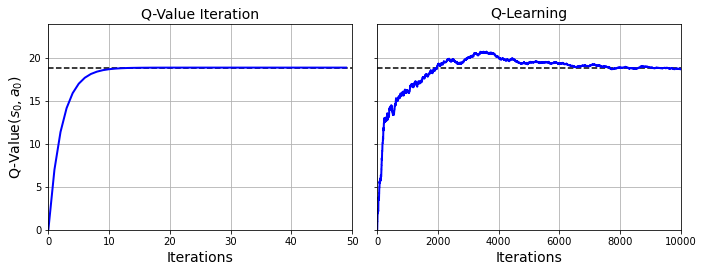

In [ ]:

true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])
    ax.grid(True)

plt.show()

# Deep Q-Network

Construyamos el DQN. Dado un estado, estimará, para cada acción posible, la suma de recompensas futuras descontadas que puede esperar después de realizar esa acción (pero antes de ver su resultado):

In [ ]:
tf.random.set_seed(42)

input_shape = [4]  # == env.observation_space.shape
n_outputs = 2  # == env.action_space.n

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

Para seleccionar una acción utilizando este DQN, simplemente elegimos la acción con el mayor valor Q previsto. Sin embargo, para asegurarnos de que el agente explora el entorno, elegimos una acción aleatoria con probabilidad `epsilon`.

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs) 
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()  # acción óptima según la DQN

También necesitaremos un búfer de repetición. Contendrá las experiencias del agente, en forma de tuplas: `(obs, action, reward, next_obs, done)`. Para ello podemos utilizar la clase `deque`:

In [50]:
from collections import deque

replay_buffer = deque(maxlen=2000)

In [ ]:
# Implementación de un búfer circular básico

class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = np.empty(max_size, dtype=object)
        self.max_size = max_size
        self.index = 0
        self.size = 0

    def append(self, obj):
        self.buffer[self.index] = obj
        self.size = min(self.size + 1, self.max_size)
        self.index = (self.index + 1) % self.max_size

    def sample(self, batch_size):
        indices = np.random.randint(self.size, size=batch_size)
        return self.buffer[indices]

Y vamos a crear una función para muestrear experiencias desde el buffer de repetición. Devolverá un vector de 6 elementos: `[obs, actions, rewards, next_obs, dones, truncateds]`.

In [52]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)
    ]  # [states, actions, rewards, next_states, dones, truncateds]

Ahora podemos crear una función que utilizará el DQN para reproducir un paso, y grabar su experiencia en el buffer de reproducción:

In [53]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, truncated, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done, truncated))
    return next_state, reward, done, truncated, info

Por último, vamos a crear una función que muestre algunas experiencias del buffer de repetición y realice un paso de entrenamiento:

In [ ]:
# para la reproducibilidad, y para generar la siguiente figura
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = [] 
best_score = 0

In [ ]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)  # el episodio no se termina o se trunca
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

Y ahora, ¡a entrenar a la modelo!

In [ ]:
for episode in range(600):
    obs, info = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    # muestra información de depuración, almacena datos para la siguiente figura y
    # mantiene un registro de los mejores pesos del modelo hasta el momento
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)  # restablece las mejores ponderaciones del modelo

Episode: 600, Steps: 200, eps: 0.010

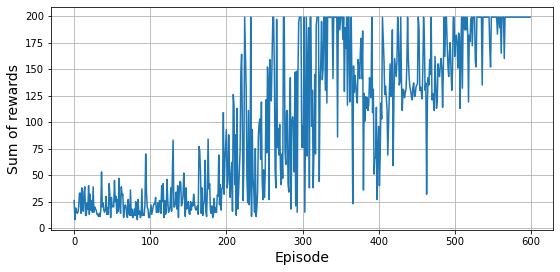

In [ ]:

plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:

show_one_episode(epsilon_greedy_policy)

Ejecutamos 600 episodios, cada uno durante un máximo de 200 pasos. En cada paso,  primero calculamos el valor epsilon para la política ε-greedy: bajará de 1 a 0,01, de manera lineal,  en algo menos de 500 episodios. Después, llamamos a la función play_one_step(), que utilizará  la política ε-greedy para elegir una acción y, después, la ejecutará y grabará la experiencia en el  búfer de repetición. Si el episodio ha acabado o se ha truncado, salimos del bucle. Por último, si  hemos pasado del episodio 50, llamamos a la función training_step() para entrenar el modelo  con un lote muestreado del búfer de repetición. La razón por la que jugamos muchos episodios  sin entrenar es que queremos dar al búfer de repetición algo de tiempo para llenarse (si no  esperamos lo suficiente, no habrá suficiente diversidad en el búfer de repetición). ¡Ya está:  hemos implementado el algoritmo de Q-Learning profundo! 

No está nada mal. 😀

## Fixed Q-Value Targets

Creemos el DQN en línea:

In [ ]:
# crea el mismo modelo DQN que antes

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

Ahora cree el DQN de destino: es sólo un clon del DQN en línea:

In [ ]:
target = tf.keras.models.clone_model(model)  # clonar la arquitectura del modelo
target.set_weights(model.get_weights())  # copiar los pesos

A continuación, utilizamos el mismo código que arriba excepto la línea marcada con `# <= CHANGED`:

In [ ]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = [] 
best_score = 0

batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error

replay_buffer = deque(maxlen=2000)  # reinicia el búfer de repetición

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = target.predict(next_states, verbose=0)  # <= CHANGED
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

De nuevo, este es el mismo código que antes, excepto por las líneas marcadas con `# <= CHANGED`:

In [ ]:
for episode in range(600):
    obs, info = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info, truncated = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)
        if episode % 50 == 0:                        # <= CHANGED
            target.set_weights(model.get_weights())  # <= CHANGED

model.set_weights(best_weights)

Episode: 600, Steps: 200, eps: 0.010

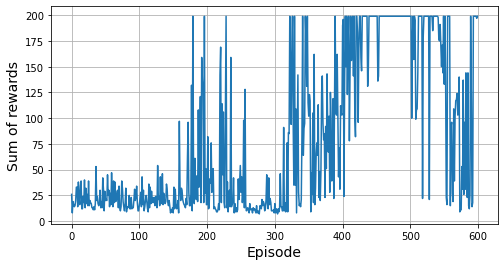

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
show_one_episode(epsilon_greedy_policy)